# Map of My Favorite Cafes in Barcelona

This map is just for fun and to learn how to make maps in matplotlib :)

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [19]:
gdf = gpd.read_file("barcelona.geojson")

In [20]:
if gdf.crs is None:
    gdf = gdf.set_crs("EPSG:4326")

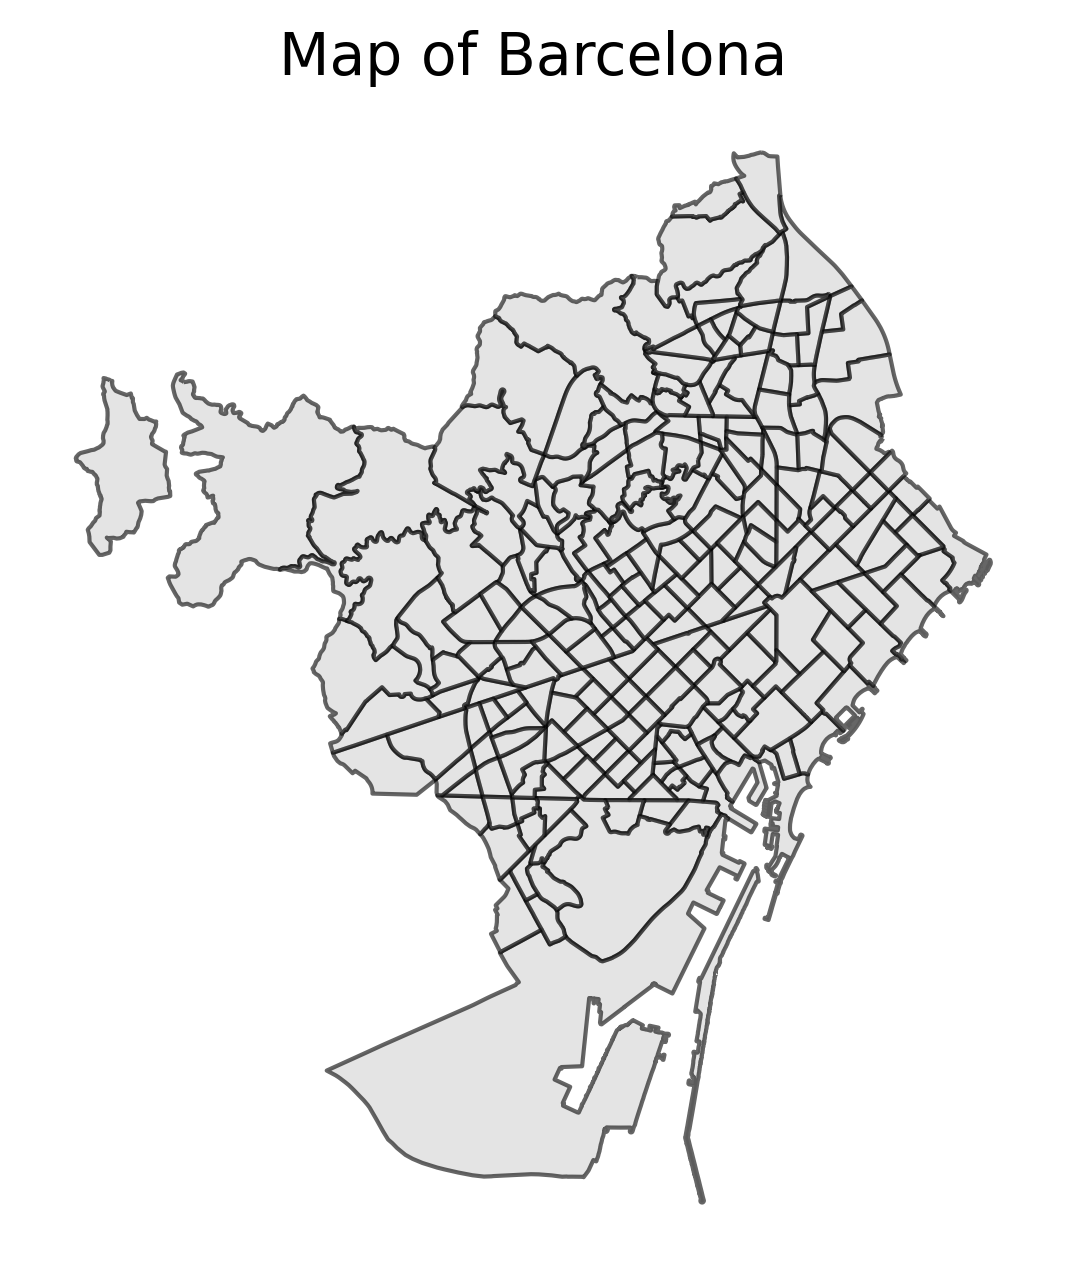

In [21]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
gdf.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.6)

ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.title("Map of Barcelona", fontsize=14)
plt.show()

In [22]:
def get_lat_lon(address):
    geolocator = Nominatim(user_agent="geo_locator")
    
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None  # Address not found
    except GeocoderTimedOut:
        return None  # Handle timeout

address = "Carrer de Pujades, 134, Sant Martí, 08005 Barcelona, Spain"
coords = get_lat_lon(address)

if coords:
    print(f"Latitude: {coords[0]}, Longitude: {coords[1]}")
else:
    print("Address not found.")

Latitude: 41.3990217, Longitude: 2.197467


In [23]:
personal_path = '../../Fonts_GT_Super/Desktop'
font_path = personal_path + '/GT-Eesti/GT-Eesti-Text-Book-Trial.otf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + '/GT-Eesti/GT-Eesti-Display-Bold-Trial.otf')

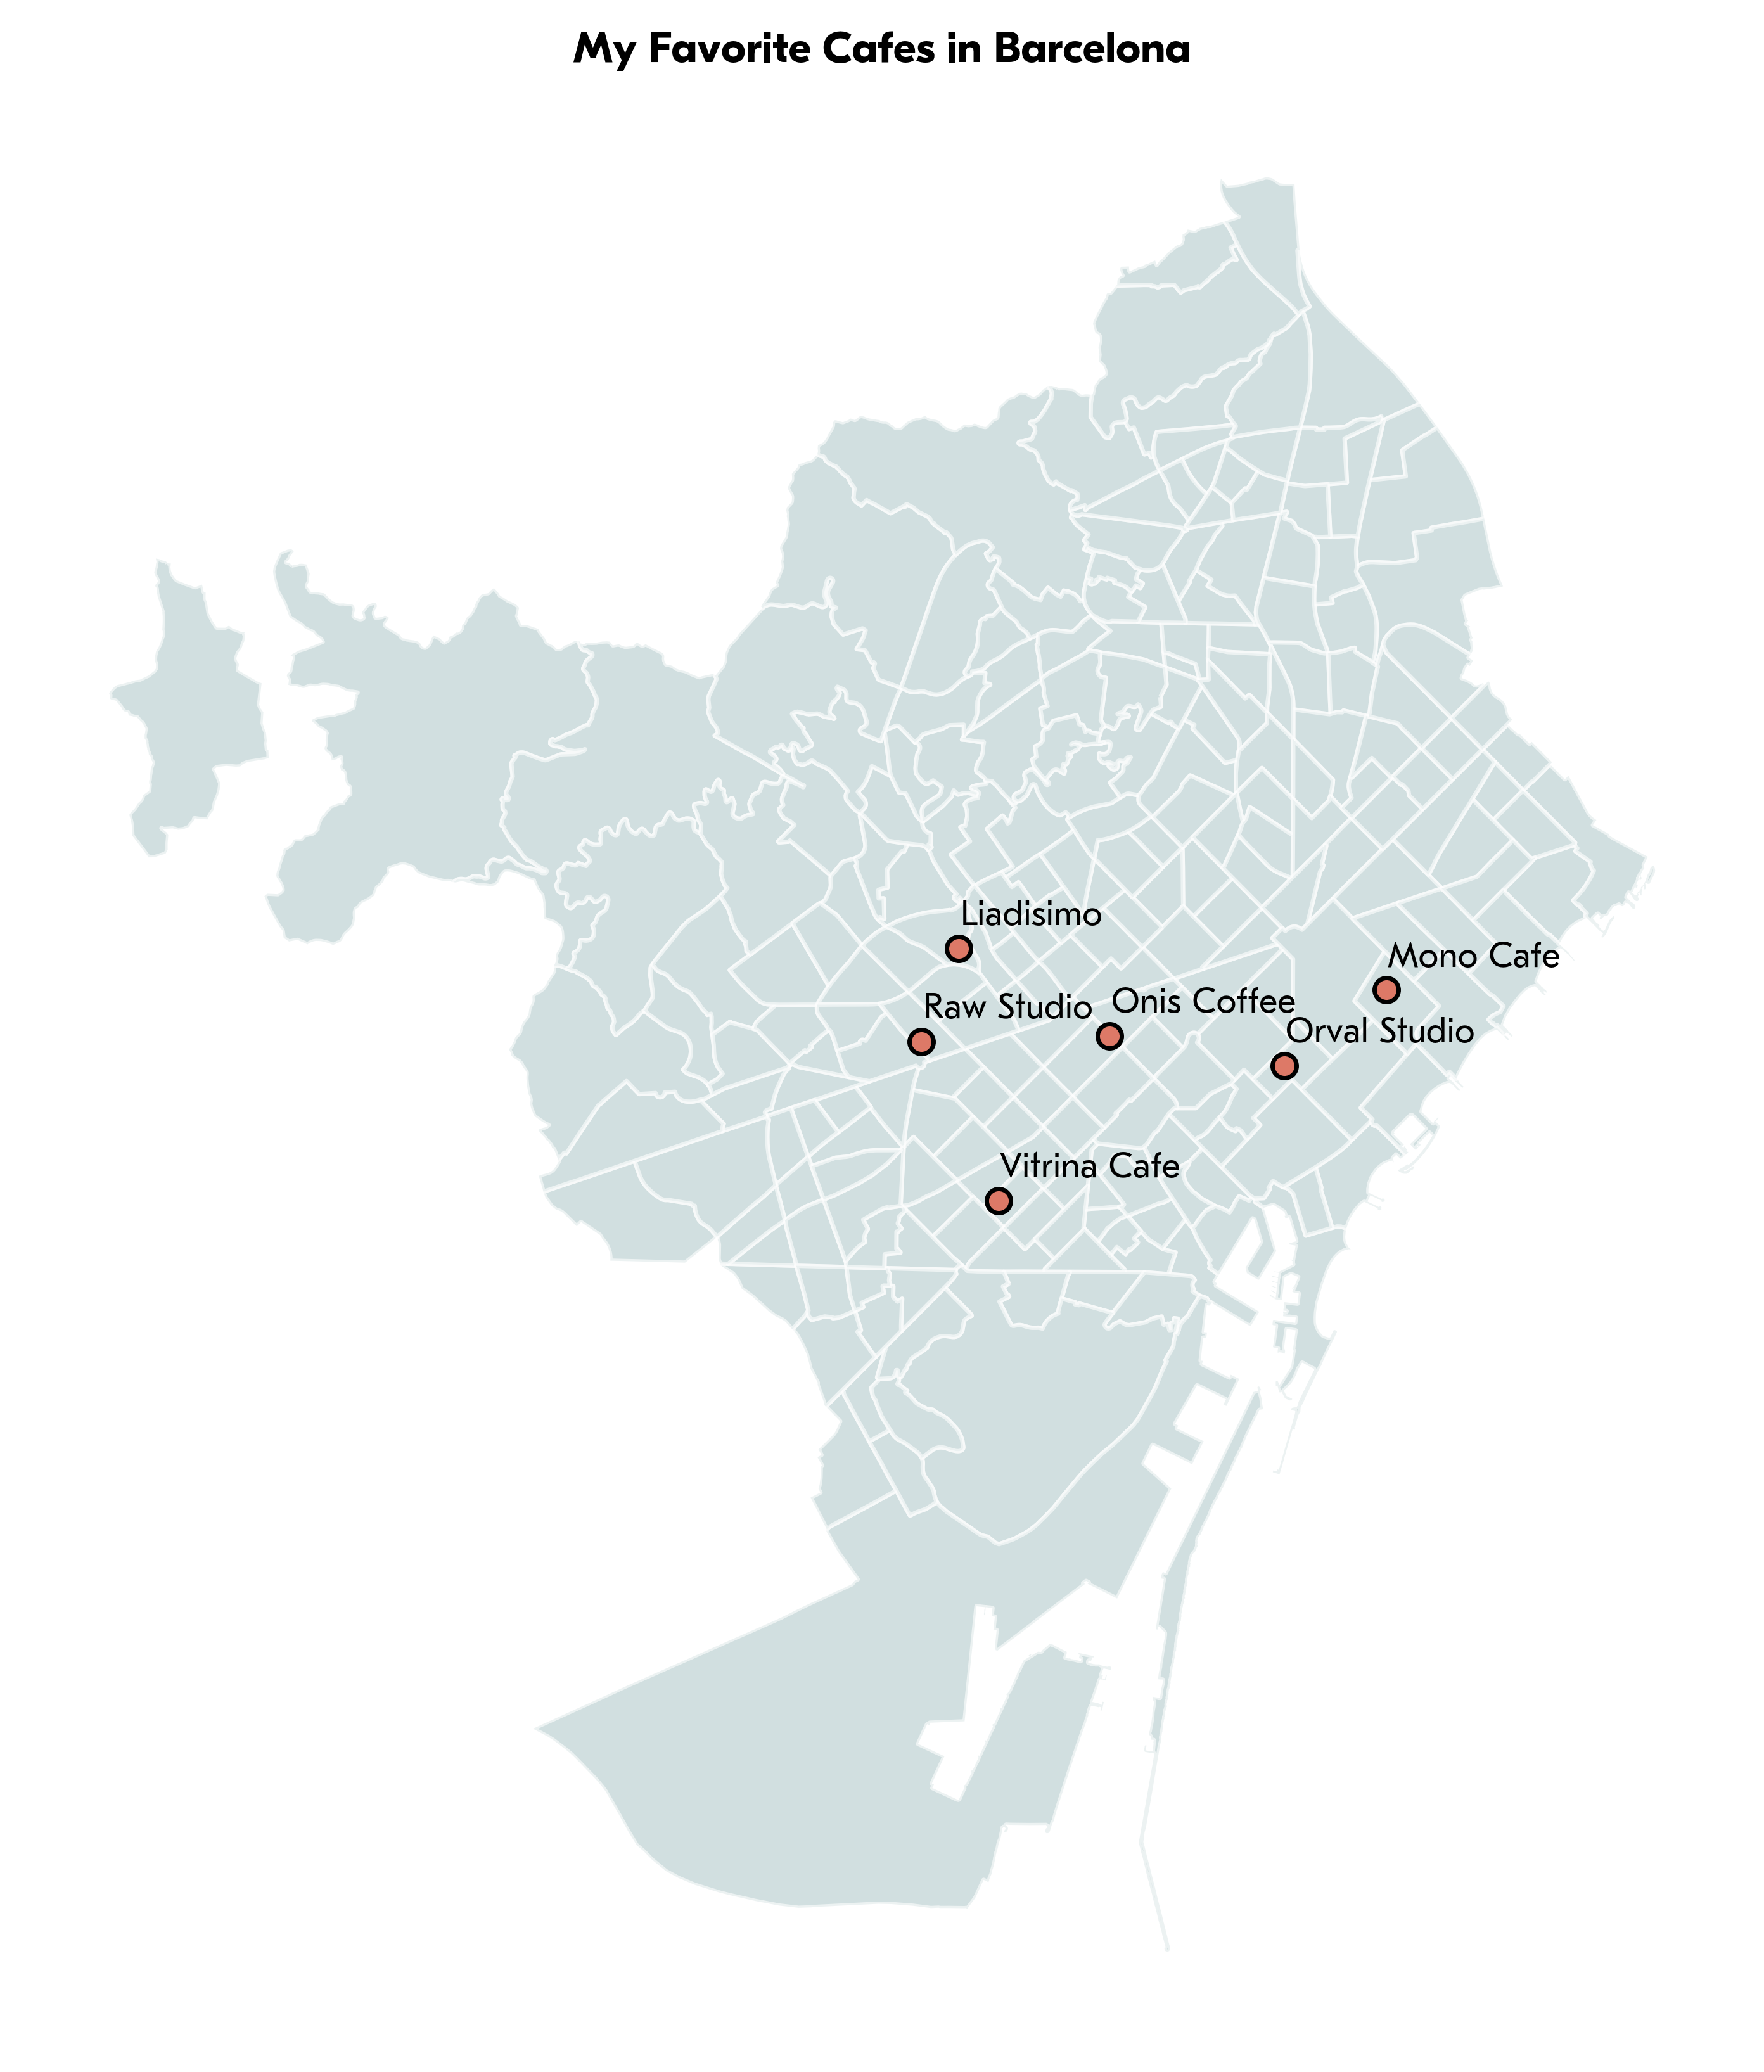

In [24]:
locations = [
    {"name": "Onis Coffee", "lat": 41.395108, "lon": 2.166050},
    {"name": "Vitrina Cafe", "lat": 41.381053, "lon": 2.153405},
    {"name": "Orval Studio", "lat": 41.392555, "lon": 2.185878},
    # {"name": "Three Marks Coffee", "lat": 41.391377, "lon": 2.175699},
    {"name": "Mono Cafe", "lat": 41.3990217, "lon": 2.197467},
    {"name": "Raw Studio", "lat": 41.394616, "lon": 2.144675},
    {"name": "Liadisimo", "lat": 41.4025678, "lon": 2.1489001},
]

# Convert locations to GeoDataFrame
points_gdf = gpd.GeoDataFrame(
    locations,
    geometry=[Point(lon, lat) for lon, lat in zip(
        [loc["lon"] for loc in locations], [loc["lat"] for loc in locations]
    )],
    crs="EPSG:4326"  # Latitude/Longitude CRS
)

# Ensure both datasets are in the same CRS
points_gdf = points_gdf.to_crs(gdf.crs)

# Plot Barcelona boundaries
fig, ax = plt.subplots(figsize=(10, 8), dpi=500)
gdf.plot(ax=ax, edgecolor="white", facecolor="#B3CBCC", alpha=0.6, linewidth=1)

# Plot markers
points_gdf.plot(ax=ax, color="#DD7967", markersize=30, edgecolor="black", zorder=3)

# Add labels to markers
for idx, row in points_gdf.iterrows():
    ax.text(row.geometry.x + 0.0002, row.geometry.y +0.002, row["name"], fontsize=8, ha="left", color="black", font=font)

ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.title("My Favorite Cafes in Barcelona", fontsize=18, font=bold_font)
plt.savefig("barcelona_cafes.png", dpi=300, bbox_inches="tight")
plt.show()

In [34]:
bold_title = bold_font.copy()
bold_title.set_size(18) 

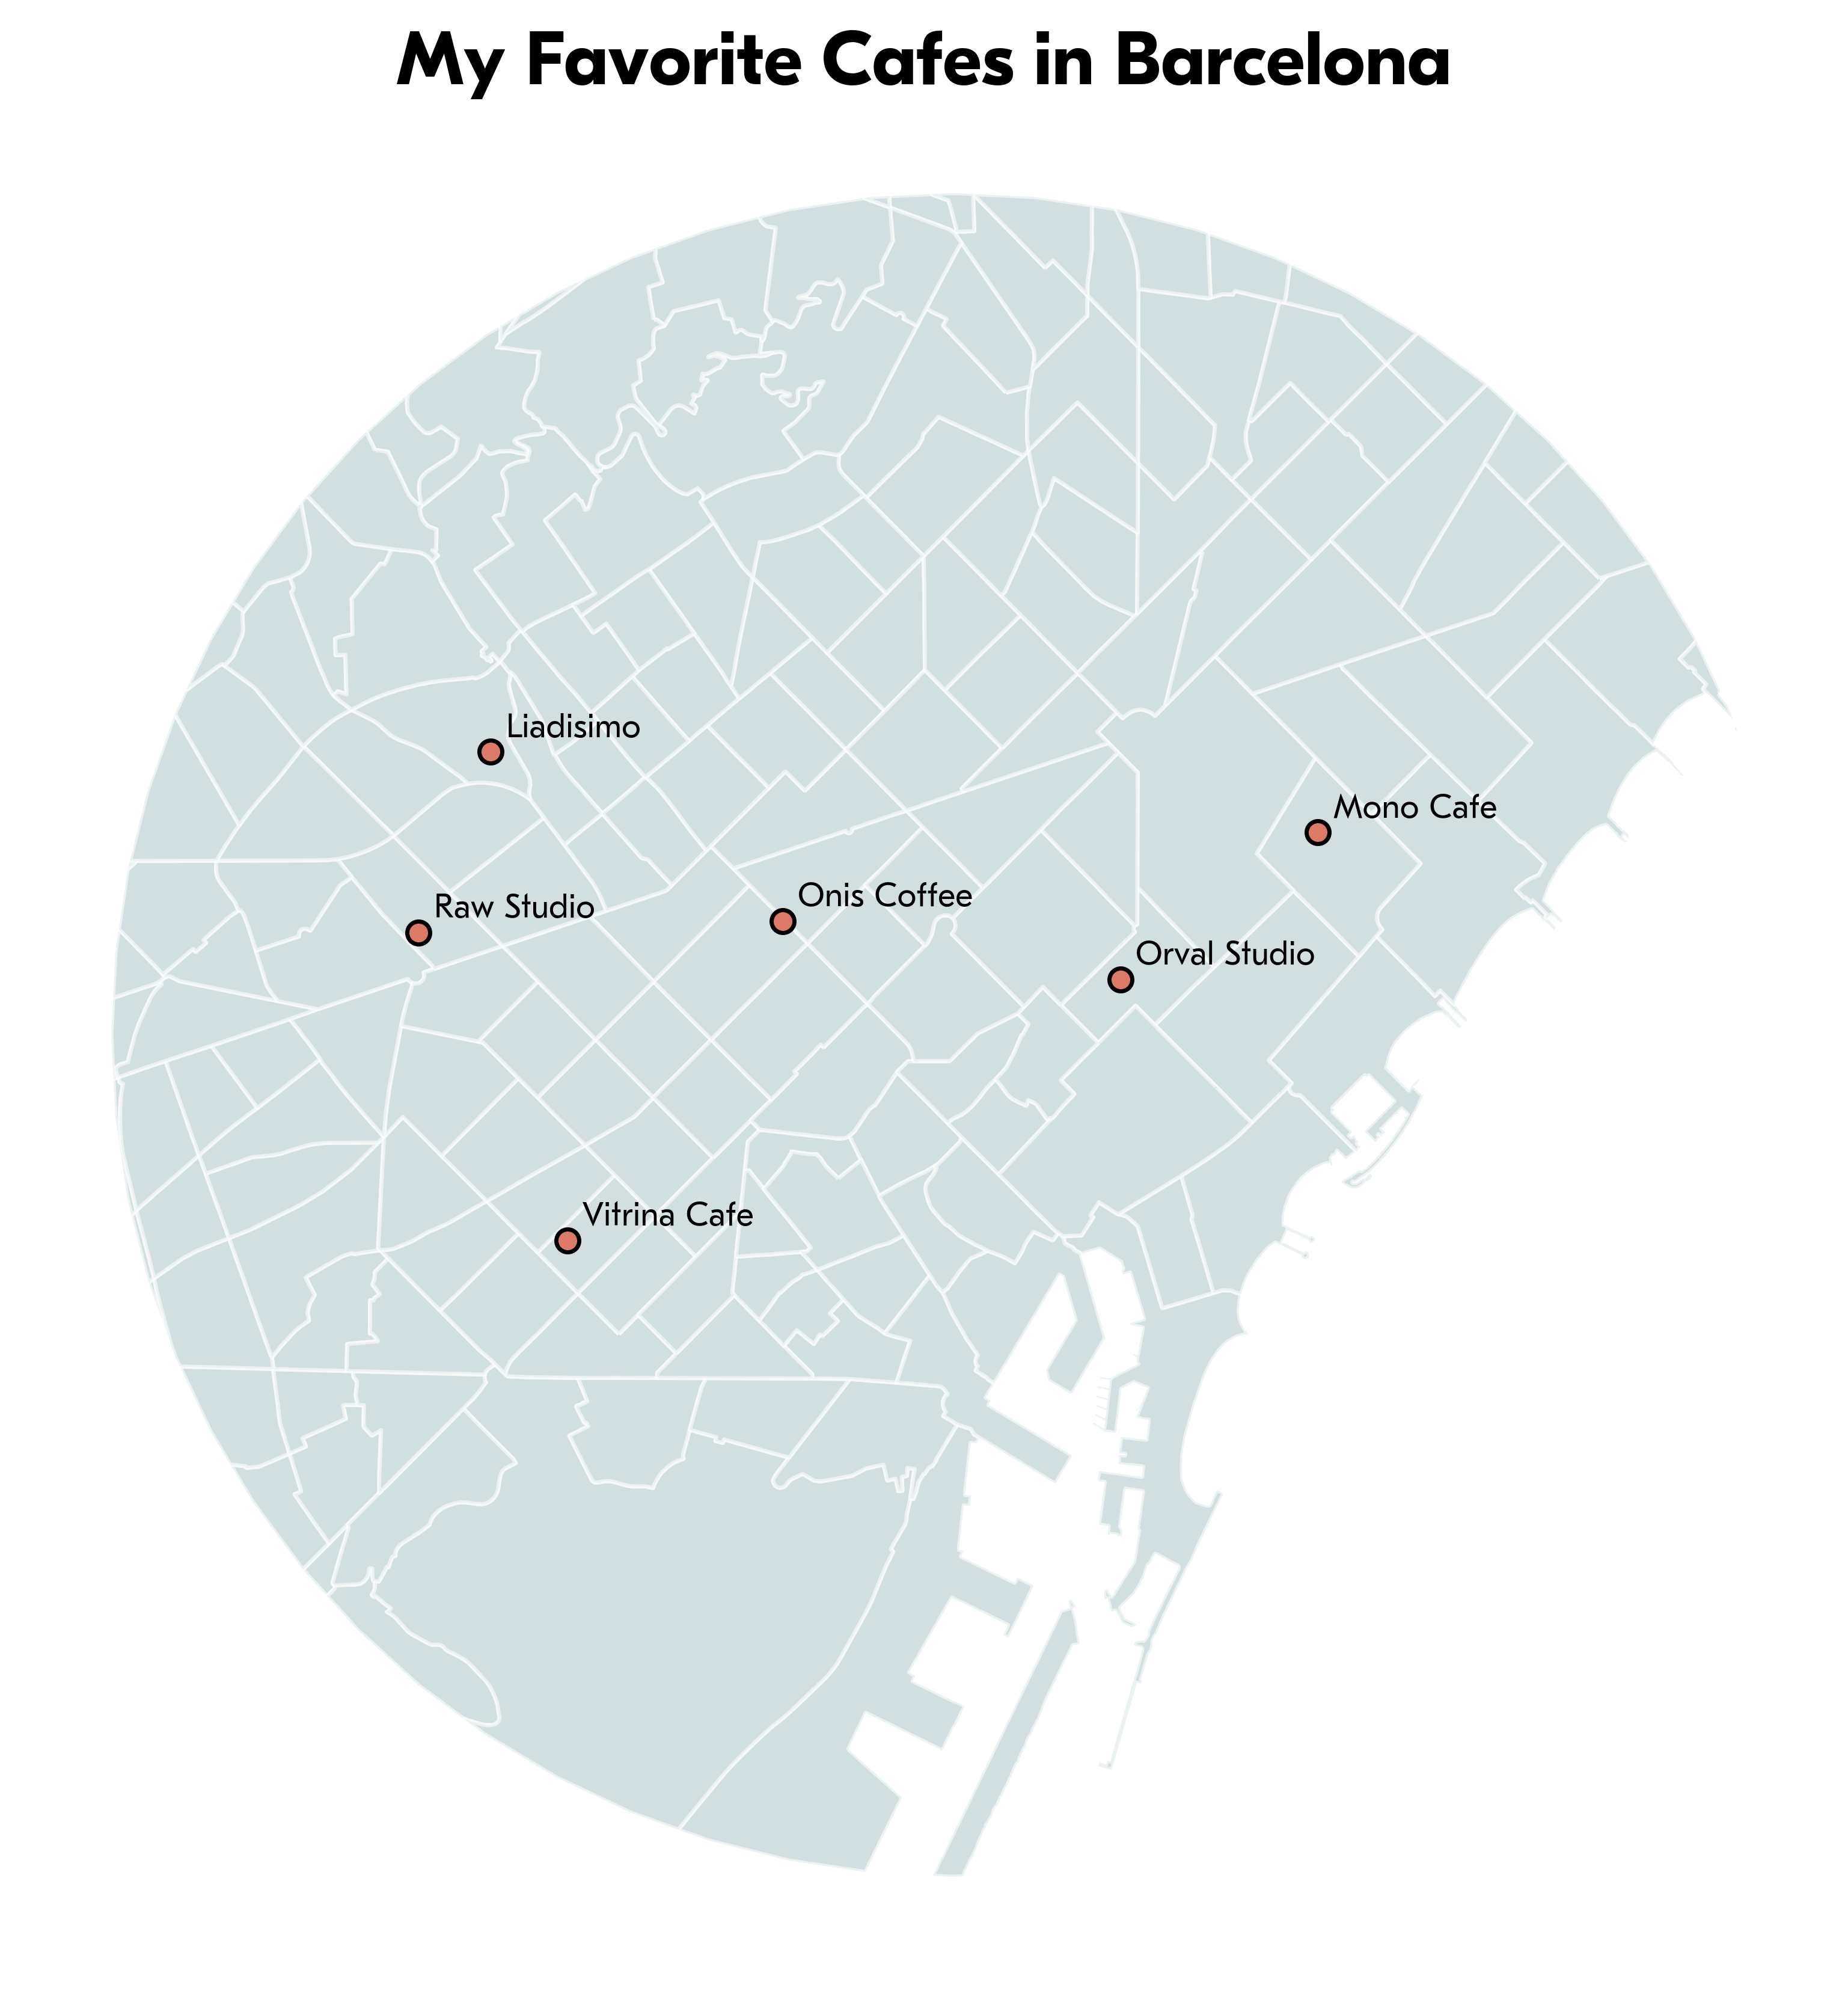

In [49]:
locations = [
    {"name": "Onis Coffee", "lat": 41.395108, "lon": 2.166050},
    {"name": "Vitrina Cafe", "lat": 41.381053, "lon": 2.153405},
    {"name": "Orval Studio", "lat": 41.392555, "lon": 2.185878},
    {"name": "Mono Cafe", "lat": 41.3990217, "lon": 2.197467},
    {"name": "Raw Studio", "lat": 41.394616, "lon": 2.144675},
    {"name": "Liadisimo", "lat": 41.4025678, "lon": 2.1489001},
]

# Convert locations to GeoDataFrame
points_gdf = gpd.GeoDataFrame(
    locations,
    geometry=[Point(loc["lon"], loc["lat"]) for loc in locations],
    crs="EPSG:4326"  # Latitude/Longitude CRS
)

gdf = gpd.read_file("barcelona.geojson")

# Convert to Web Mercator (EPSG:3857) for meters-based calculations
gdf = gdf.to_crs("EPSG:3857")
points_gdf = points_gdf.to_crs("EPSG:3857")

# Define the circular crop center (convert lat/lon to Web Mercator)
center_latlon = Point(2.176050, 41.390108)  # Center in lat/lon
center = gpd.GeoSeries([center_latlon], crs="EPSG:4326").to_crs("EPSG:3857").geometry[0]

# radius (in meters)
radius = 5500  # 3 km radius

# Create circular mask
circle = center.buffer(radius)

# Clip the map and points to the circular mask
gdf_cropped = gdf.clip(circle)
points_cropped = points_gdf[points_gdf.geometry.within(circle)]

# Plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=500)
ax.set_facecolor("#F4F4F4")  # Set background color outside the map

gdf_cropped.plot(ax=ax, edgecolor="white", facecolor="#B3CBCC", alpha=0.6, linewidth=1)

# Plot cropped markers
points_cropped.plot(ax=ax, color="#DD7967", markersize=30, edgecolor="black", zorder=3)

for idx, row in points_cropped.iterrows():
    ax.text(row.geometry.x + 100, row.geometry.y + 100, row["name"], fontsize=8, font=font, ha="left", color="black")

ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.title("My Favorite Cafes in Barcelona", fontsize=18, font=bold_title)
plt.savefig("barcelona_cafes_circular.png", dpi=300, bbox_inches="tight")
plt.show()